In [2]:
!pip install mlflow


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:


import mlflow

mlflow.set_tracking_uri("http://3.6.41.65:5000/")

with mlflow.start_run():
    mlflow.log_param("param1", 15)
    mlflow.log_metric("metric1", 0.89)

🏃 View run glamorous-duck-242 at: http://3.6.41.65:5000/#/experiments/0/runs/15029dec003240afb50f1def7be19170
🧪 View experiment at: http://3.6.41.65:5000/#/experiments/0


In [4]:
import pandas as pd
df=pd.read_csv('../data/raw/youtube_bulk_raw.csv')

In [5]:
df.head()

,video_id,category,author,text,likes,published_at
0,4wZwXhoxRIA,technology,@justicebuys1,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z
1,4wZwXhoxRIA,technology,@jacklynkateisrael2568,😮😮,0,2025-09-11T09:52:55Z
2,4wZwXhoxRIA,technology,@kevinjessica6389,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z
3,4wZwXhoxRIA,technology,@FrancescaWhite-y6y,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z
4,4wZwXhoxRIA,technology,@lucasgamingchannel-vm7pg,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z


In [6]:
df.isnull().sum()

video_id         0
category         0
author          10
text            22
likes            0
published_at     0
dtype: int64

In [7]:
df.shape

(76693, 6)

In [8]:
df.drop(columns='author',inplace=True)

In [9]:
df[df['text'].str.strip() != ""]

,video_id,category,text,likes,published_at
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z
1,4wZwXhoxRIA,technology,😮😮,0,2025-09-11T09:52:55Z
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z
...,...,...,...,...,...
76688,4MXqlEa6M2o,education,Ye तो बेक्कूफ शिक्षा मंत्री है,27,2025-09-09T09:31:59Z
76689,4MXqlEa6M2o,education,Enke baat ka koi bharosa nahi hai.,4,2025-09-09T09:30:13Z
76690,4MXqlEa6M2o,education,15 September Tak 1 lakh + notification nikalo,39,2025-09-09T09:27:14Z
76691,4MXqlEa6M2o,education,1st & Last Education minister in Bihar,4,2025-09-09T09:24:48Z


In [10]:
df = df[df['text'].str.strip() != ""].reset_index(drop=True)
before = len(df)
df = df.drop_duplicates(subset=['video_id','text'], keep='first').reset_index(drop=True)
print("Dropped duplicates:", before - len(df))

Dropped duplicates: 19896


In [11]:
# 1. Count blanks
blank_count = (df['text'].str.strip() == "").sum()
print("Blank comments:", blank_count)

# 2. Count duplicates
dup_count = df.duplicated(subset=['video_id','text']).sum()
print("Duplicate comments:", dup_count)

# 3. Show some examples of duplicates
dupes = df[df.duplicated(subset=['video_id','text'], keep=False)]
dupes.head(10)


Blank comments: 0
Duplicate comments: 0


,video_id,category,text,likes,published_at


In [12]:
df.shape

(56797, 5)

In [13]:
!pip install emoji


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import re, html, emoji

url_re = re.compile(r'https?://\S+|www\.\S+')
mention_re = re.compile(r'@\w+')
html_tag_re = re.compile(r'<.*?>')
multispace_re = re.compile(r'\s+')

def clean_text(text, remove_emojis=False):
    s = "" if pd.isna(text) else str(text)
    s = html.unescape(s)
    s = url_re.sub(' ', s)
    s = mention_re.sub(' ', s)
    s = html_tag_re.sub(' ', s)
    if remove_emojis:
        try:
            s = emoji.replace_emoji(s, replace='')
        except Exception:
            s = s.encode('ascii', errors='ignore').decode()
    s = s.lower().strip()
    s = multispace_re.sub(' ', s)
    return s

df['text_clean'] = df['text'].apply(lambda x: clean_text(x, remove_emojis=False))
df[['text','text_clean']].head()


,text,text_clean
0,All products can be found on www.justicebuys.c...,all products can be found on 🙌🏼 since i review...
1,😮😮,😮😮
2,Bro “how to talk to woman in 6 steps” is so re...,bro “how to talk to woman in 6 steps” is so re...
3,I was gonna say does it give you the drinks fo...,i was gonna say does it give you the drinks fo...
4,Anyone gonna talk abt what was o. His pc,anyone gonna talk abt what was o. his pc


In [15]:
df[(df['text_clean'].str.strip() == '')]

,video_id,category,text,likes,published_at,text_clean
232,4wZwXhoxRIA,technology,https://youtube.com/@isha-learn?si=beDQvLlqLI4...,0,2025-05-19T09:04:49Z,
469,4wZwXhoxRIA,technology,@a2d,0,2025-05-01T07:07:46Z,
643,4wZwXhoxRIA,technology,@hopescope,0,2025-03-10T03:08:56Z,
3819,ZggspAgMsyE,gaming,https://youtu.be/gaQN_xoYPtc?sub_confirmation=1,0,2025-09-02T09:34:58Z,
3820,ZggspAgMsyE,gaming,https://www.youtube.com/live/e9_kRQPkryo?si=Ty...,0,2025-09-01T12:17:50Z,
...,...,...,...,...,...,...
52617,sUf2PtEZris,music,https://youtube.com/shorts/xGK0SThe9Kk?si=CcUF...,2,2025-05-03T06:26:12Z,
53646,sUf2PtEZris,music,https://youtube.com/shorts/2iqLFQY7xaQ?si=GUfg...,1,2025-04-24T09:03:52Z,
53670,sUf2PtEZris,music,https://youtu.be/IVNYqQWjbmM?si=DlCRtfpH-1t2Vxek,1,2025-04-24T04:59:47Z,
53713,sUf2PtEZris,music,https://youtube.com/shorts/Tbuet2MGwpk?si=w5od...,0,2025-04-23T21:32:18Z,


In [16]:
df.shape

(56797, 6)

In [17]:
df = df[~(df['text_clean'].str.strip() == '')]

In [18]:
df.head()

,video_id,category,text,likes,published_at,text_clean
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,all products can be found on 🙌🏼 since i review...
1,4wZwXhoxRIA,technology,😮😮,0,2025-09-11T09:52:55Z,😮😮
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro “how to talk to woman in 6 steps” is so re...
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,i was gonna say does it give you the drinks fo...
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt what was o. his pc


In [19]:
df[df['text_clean'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,video_id,category,text,likes,published_at,text_clean


In [20]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['text_clean'] = df['text_clean'].str.strip()

In [21]:
df.shape

(56252, 6)

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment on cleaned text
df['sentiment'] = df['text_clean'].apply(get_sentiment)

# Check results
print(df[['text_clean', 'sentiment']].head(10))
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


                                          text_clean sentiment
0  all products can be found on 🙌🏼 since i review...  positive
1                                                 😮😮   neutral
2  bro “how to talk to woman in 6 steps” is so re...   neutral
3  i was gonna say does it give you the drinks fo...  positive
4           anyone gonna talk abt what was o. his pc   neutral
5  how is everyone not talking about his search?!...  positive
6               when tech goes from wow to how?! 😳👉🧠  positive
7                        this is why l love this guy  positive
8                                    i have number 8  positive
9  imagine using that flashlight 🔦 in the middle ...  positive

Sentiment distribution:
sentiment
positive    34606
neutral     16634
negative     5012
Name: count, dtype: int64


In [23]:
df.sample(10)

,video_id,category,text,likes,published_at,text_clean,sentiment
54303,sUf2PtEZris,music,एक नंबर ❣️❣️❣️,1,2025-04-22T11:08:57Z,एक नंबर ❣️❣️❣️,positive
47153,sUf2PtEZris,music,Anyone today??🙄,4,2025-05-30T06:06:29Z,anyone today??🙄,neutral
41755,sUf2PtEZris,music,Sabse ghatiya over hyped song,0,2025-06-12T01:54:36Z,sabse ghatiya over hyped song,neutral
51770,sUf2PtEZris,music,Isha malviya is super dance,4,2025-05-08T06:01:22Z,isha malviya is super dance,positive
45384,sUf2PtEZris,music,Fab hai bhyii vibe hai❤💗🫶,0,2025-06-04T07:30:55Z,fab hai bhyii vibe hai❤💗🫶,positive
23548,sUf2PtEZris,music,❤❤❤ true love❤❤❤,0,2025-07-20T14:21:20Z,❤❤❤ true love❤❤❤,positive
2813,vwTL0SLEl1M,technology,Somebody completely copied you video with your...,0,2025-08-26T12:30:55Z,somebody completely copied you video with your...,neutral
10957,GJZAcj4P99g,music,New trend unlocked❤\nIni onathin ith mathy sch...,7,2025-07-14T05:41:33Z,new trend unlocked❤ ini onathin ith mathy scho...,positive
8374,GJZAcj4P99g,music,Wooooooow sema vibe ❤❤❤❤,0,2025-09-08T05:53:35Z,wooooooow sema vibe ❤❤❤❤,positive
11162,GJZAcj4P99g,music,"ഏത് മൂട്, റംസാൻ മൂട്…",0,2025-07-06T12:07:51Z,"ഏത് മൂട്, റംസാൻ മൂട്…",neutral


In [24]:
df['text_clean']=df['text_clean'].str.replace('\n', ' ', regex=True)


In [25]:
df['sentiment_numeric'] = df['sentiment'].replace({
    'positive': 1,
    'negative': -1,
    'neutral': 0
})


C:\Users\vaibh\AppData\Local\Temp\ipykernel_14516\1706387719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment_numeric'] = df['sentiment'].replace({


In [26]:
df['word_count']=df['text_clean'].apply(lambda x: len(x.split()))

In [27]:
df.sample()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count
11921,sUf2PtEZris,music,😢,0,2025-09-09T10:44:50Z,😢,negative,-1,1


In [28]:
# Word frequency → shows most common terms used (good for making word clouds,
# stopwords analysis).

from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['text_clean'])

# Split into words and count
word_frequency = Counter(all_text.split())

# Convert into DataFrame
word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_frequency_df.head(20))  # top 20 words


         word  frequency
15159    song       8056
9424      kon       7176
40        the       6545
8           i       4614
30         is       4565
24         to       4010
8814      hai       3978
14          a       3748
69       this       3602
125       and       3502
39        you       3085
8890       ko       2820
44     anyone       2695
27         in       2640
9323     dekh       2525
757         ❤       2493
85       like       2484
37         it       2443
8987     raha       2439
82         of       2420


In [29]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
df = df[(df['word_count'] >= 2) & (df['word_count'] <= 100)]


In [31]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['text_clean'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['text_clean'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_stop_words,num_punctuation_chars
54220,sUf2PtEZris,music,एक नंबर👌❤.,3,2025-04-22T12:05:45Z,एक नंबर👌❤.,positive,1,2,0,1
4076,OncB_R10T7Y,gaming,Does mass infection now has less speed?,0,2025-09-05T05:44:33Z,does mass infection now has less speed?,neutral,0,7,3,1
30993,sUf2PtEZris,music,so so lovly song,0,2025-07-02T06:01:01Z,so so lovly song,neutral,0,4,2,0
41292,sUf2PtEZris,music,Bangladeshi ke ke aso,0,2025-06-12T17:36:16Z,bangladeshi ke ke aso,neutral,0,4,0,0
47056,sUf2PtEZris,music,Time 1:37 wow🎉,0,2025-05-30T11:11:37Z,time 1:37 wow🎉,positive,1,3,0,1


In [33]:
df.sample(5)

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_stop_words,num_punctuation_chars
56605,4MXqlEa6M2o,education,Yare bhai tre5 ke liye bhi rahane do.,0,2025-09-09T11:41:42Z,yare bhai tre5 ke liye bhi rahane do.,neutral,0,8,0,1
12333,sUf2PtEZris,music,Bda bkbas Gana ha,0,2025-09-06T07:02:01Z,bda bkbas gana ha,positive,1,4,0,0
36157,sUf2PtEZris,music,Marathi song trend setter Sanju Rathod ❤❤,0,2025-06-21T16:23:46Z,marathi song trend setter sanju rathod ❤❤,positive,1,7,0,0
39134,sUf2PtEZris,music,Hits 100 million 🎉 that's brilliant for marath...,0,2025-06-16T11:42:43Z,hits 100 million 🎉 that's brilliant for marath...,positive,1,10,1,1
37938,sUf2PtEZris,music,World best song ❤❤,0,2025-06-18T12:26:36Z,world best song ❤❤,positive,1,4,0,0


In [34]:
df['num_chars'] = df['text_clean'].apply(len)

df.head()

,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_stop_words,num_punctuation_chars,num_chars
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,all products can be found on 🙌🏼 since i review...,positive,1,24,9,1,116
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro “how to talk to woman in 6 steps” is so re...,neutral,0,12,5,0,53
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,i was gonna say does it give you the drinks fo...,positive,1,12,7,1,54
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt what was o. his pc,neutral,0,9,3,1,40
5,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,how is everyone not talking about his search?!...,positive,1,15,6,4,85


In [35]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['text_clean'] = df['text_clean'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_stop_words,num_punctuation_chars,num_chars
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04T19:28:08Z,all product can be found on 🙌🏼 since i review ...,positive,1,24,9,1,116
2,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10T23:44:24Z,bro “how to talk to woman in 6 steps” is so re...,neutral,0,12,5,0,53
3,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09T16:25:03Z,i wa gonna say doe it give you the drink for f...,positive,1,12,7,1,54
4,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08T22:33:58Z,anyone gonna talk abt what wa o. his pc,neutral,0,9,3,1,40
5,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08T12:17:37Z,how is everyone not talking about his search?!...,positive,1,15,6,4,85


In [36]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['hour'] = df['published_at'].dt.hour
df['weekday'] = df['published_at'].dt.weekday
df['month'] = df['published_at'].dt.month


In [37]:
from sklearn.preprocessing import OneHotEncoder

# ✅ Handle both sklearn versions
try:
    ohe = OneHotEncoder(sparse_output=False, drop="first")  # new versions
except TypeError:
    ohe = OneHotEncoder(sparse=False, drop="first")  # older versions

category_encoded = ohe.fit_transform(df[['category']])

# Convert back to DataFrame with category names
category_df = pd.DataFrame(category_encoded, columns=ohe.get_feature_names_out(['category']))

# Merge into original DataFrame
df = pd.concat([df.reset_index(drop=True), category_df.reset_index(drop=True)], axis=1)

df.head()


,video_id,category,text,likes,published_at,text_clean,sentiment,sentiment_numeric,word_count,num_stop_words,num_punctuation_chars,num_chars,hour,weekday,month,category_gaming,category_movies,category_music,category_technology
0,4wZwXhoxRIA,technology,All products can be found on www.justicebuys.c...,1978,2025-01-04 19:28:08+00:00,all product can be found on 🙌🏼 since i review ...,positive,1,24,9,1,116,19,5,1,0.0,0.0,0.0,1.0
1,4wZwXhoxRIA,technology,Bro “how to talk to woman in 6 steps” is so re...,0,2025-09-10 23:44:24+00:00,bro “how to talk to woman in 6 steps” is so re...,neutral,0,12,5,0,53,23,2,9,0.0,0.0,0.0,1.0
2,4wZwXhoxRIA,technology,I was gonna say does it give you the drinks fo...,0,2025-09-09 16:25:03+00:00,i wa gonna say doe it give you the drink for f...,positive,1,12,7,1,54,16,1,9,0.0,0.0,0.0,1.0
3,4wZwXhoxRIA,technology,Anyone gonna talk abt what was o. His pc,0,2025-09-08 22:33:58+00:00,anyone gonna talk abt what wa o. his pc,neutral,0,9,3,1,40,22,0,9,0.0,0.0,0.0,1.0
4,4wZwXhoxRIA,technology,HOW IS EVERYONE NOT TALKING ABOUT HIS SEARCH?!...,0,2025-09-08 12:17:37+00:00,how is everyone not talking about his search?!...,positive,1,15,6,4,85,12,0,9,0.0,0.0,0.0,1.0


In [38]:
#  Add VADER Sentiment Scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df[['sent_neg', 'sent_neu', 'sent_pos', 'sent_compound']] = df['text_clean'].apply(
    lambda x: pd.Series(sia.polarity_scores(x))
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Drop non-numeric columns
X = df.drop(columns=['video_id','category','text','text_clean','sentiment','published_at','sentiment_numeric'])
y = df['sentiment_numeric']


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
# setup mlflow tracking server

mlflow.set_tracking_uri("http://3.6.41.65:5000/")

In [43]:
# Set or create an experiment
mlflow.set_experiment("RF Baseline")

2025/09/24 12:03:56 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://aws-mlfow-s3-bucket/mlflow-artifacts/1', creation_time=1758695637135, experiment_id='1', last_update_time=1758695637135, lifecycle_stage='active', name='RF Baseline', tags={}>

🏃 View run RandomForest_Baseline_TrainTestSplit at: http://3.6.41.65:5000/#/experiments/1/runs/4d314dca2b5d4561b9f0bc2311261c8a
🧪 View experiment at: http://3.6.41.65:5000/#/experiments/1


S3UploadFailedError: Failed to upload confusion_matrix.png to aws-mlfow-s3-bucket/mlflow-artifacts/1/4d314dca2b5d4561b9f0bc2311261c8a/artifacts/confusion_matrix.png: An error occurred (InvalidAccessKeyId) when calling the PutObject operation: The AWS Access Key Id you provided does not exist in our records.

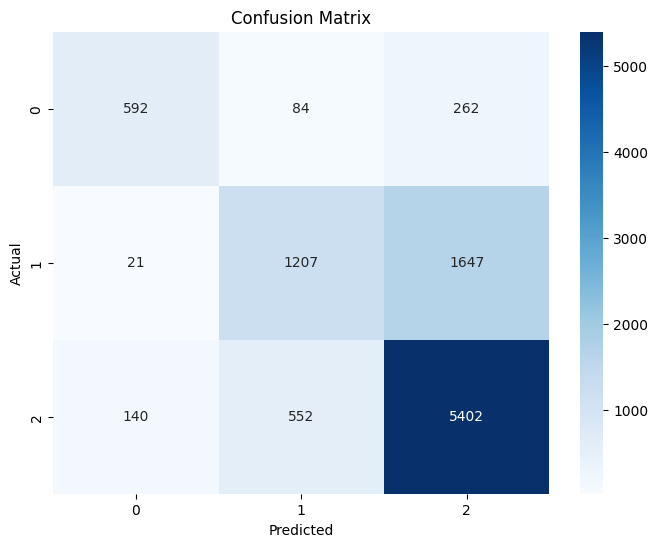

In [53]:
# ✅ Step 0: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow
import mlflow.sklearn



# Split data into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 2: Define and train  a Random Forest baseline model using MLflow
with mlflow.start_run() as run:
    # --- MLflow Run Tags ---
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")
    mlflow.set_tag(
        "description",
        "Baseline RandomForest model for sentiment analysis  with a simple train-test split",
    )

    # --- Model Parameters ---
    n_estimators = 200
    max_depth = 15
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # --- Train Model ---
    model = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, random_state=42
    )
    model.fit(X_train, y_train)

    # --- Predictions ---
    y_pred = model.predict(X_test)

    # --- Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # Only log precision, recall, f1-score
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # --- Confusion Matrix ---
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log confusion matrix plot
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # --- Log Model ---
    mlflow.sklearn.log_model(model, "random_forest_model")

    # --- Optionally Log Dataset (if small) ---
    # Example: if you have your DataFrame as df
    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")

# ✅ Print Final Accuracy
print(f"✅ Accuracy: {accuracy:.4f}")


In [ ]:
!aws configure

In [45]:
!pip install awscli


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
df.to_csv('reddit_preprocessing.csv', index=False)

In [ ]:
pd.read_csv('reddit_preprocessing.csv').head()